In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#users_data = pd.read_csv('users_final_set.csv')
%matplotlib inline
from bs4 import BeautifulSoup
import re

In [2]:
import sqlite3
sqlite_db = '/Users/varshapullabhotla/Documents/Capstone_project/SO_datadump/sdump.db'
conn = sqlite3.connect(sqlite_db) 
c = conn.cursor()

In [3]:
import pandas as pd
from pandas.io import sql

s_query = """SELECT * from users;
"""
users = pd.read_sql(s_query, con=conn)


In [4]:
users.rename(columns = {'Id':'User_Id'},inplace=True)

In [5]:
questions = pd.read_csv('/Users/varshapullabhotla/Documents/Capstone_project/stack_data/Questions.csv')
tags = pd.read_csv('/Users/varshapullabhotla/Documents/Capstone_project/stack_data/Tags.csv')


In [6]:
answers = pd.read_csv('/Users/varshapullabhotla/Documents/Capstone_project/stack_data/Answers.csv')

In [ ]:
questions.head()

In [7]:
#Filtering users based on answers
def question_tags(x):
    return x['Tag'].values

#Step 1 : Aggregate tags for each question
tags_agg = tags.groupby(['Id']).apply(question_tags)
tags_agg.name = 'tags'


In [8]:
tags_agg = tags_agg.reset_index()

In [9]:
#Step 2 : Merge questions with tags_agg to get tags per each question
tags_ques = pd.merge(questions,tags_agg,how='inner',left_on='Id',right_on='Id')

In [10]:
#Step 3 : Join answers to tags per ques data frame to get tags per answer
answers_master = pd.merge(answers,tags_ques,how='left',left_on='ParentId',right_on='Id')

In [11]:
users_masterT=pd.merge(answers_master,users,how='left',left_on='OwnerUserId_y',right_on='User_Id')

In [12]:
Answer_count=users_masterT.groupby(['OwnerUserId_y'])['Id_y'].count()
Answer_count  = Answer_count.reset_index()

In [13]:
Users_profile= pd.merge(users_masterT,Answer_count,on ='OwnerUserId_y')

In [14]:
Users_profile.head()

,Id_x,OwnerUserId_x,CreationDate_x,ParentId,Score_x,Body_x,Id_y_x,OwnerUserId_y,CreationDate_y,ClosedDate,...,Location,Views,AboutMe,LastAccessDate,ProfileImageUrl,UpVotes,CreationDate,User_Id,AccountId,Id_y_y
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,...,"Indianapolis, IN",1278.0,<p>Front-End Engineer at Exact Target</p>\n\n<...,2016-08-26T14:17:54.537,None,957.0,2008-08-01T13:56:33.807,58.0,47.0,22
1,2973,92.0,2008-08-06T00:00:22Z,2970,3,"<p>With a six word character password, he may ...",2970,58.0,2008-08-05T23:55:25Z,2012-03-06T03:17:01Z,...,"Indianapolis, IN",1278.0,<p>Front-End Engineer at Exact Target</p>\n\n<...,2016-08-26T14:17:54.537,None,957.0,2008-08-01T13:56:33.807,58.0,47.0,22
2,2976,204.0,2008-08-06T00:16:07Z,2970,13,<p>Try and gather as much information as you c...,2970,58.0,2008-08-05T23:55:25Z,2012-03-06T03:17:01Z,...,"Indianapolis, IN",1278.0,<p>Front-End Engineer at Exact Target</p>\n\n<...,2016-08-26T14:17:54.537,None,957.0,2008-08-01T13:56:33.807,58.0,47.0,22
3,2978,419.0,2008-08-06T00:24:23Z,2970,2,<P>Is the site just plain static HTML? i.e. he...,2970,58.0,2008-08-05T23:55:25Z,2012-03-06T03:17:01Z,...,"Indianapolis, IN",1278.0,<p>Front-End Engineer at Exact Target</p>\n\n<...,2016-08-26T14:17:54.537,None,957.0,2008-08-01T13:56:33.807,58.0,47.0,22
4,3055,116.0,2008-08-06T03:31:22Z,2970,5,<p>You mention your Dad was using a website pu...,2970,58.0,2008-08-05T23:55:25Z,2012-03-06T03:17:01Z,...,"Indianapolis, IN",1278.0,<p>Front-End Engineer at Exact Target</p>\n\n<...,2016-08-26T14:17:54.537,None,957.0,2008-08-01T13:56:33.807,58.0,47.0,22


In [16]:
Users_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982623 entries, 0 to 1982622
Data columns (total 30 columns):
Id_x               int64
OwnerUserId_x      float64
CreationDate_x     object
ParentId           int64
Score_x            int64
Body_x             object
Id_y_x             int64
OwnerUserId_y      float64
CreationDate_y     object
ClosedDate         object
Score_y            int64
Title              object
Body_y             object
tags               object
DownVotes          float64
DisplayName        object
Age                float64
WebsiteUrl         object
EmailHash          object
Reputation         float64
Location           object
Views              float64
AboutMe            object
LastAccessDate     object
ProfileImageUrl    object
UpVotes            float64
CreationDate       object
User_Id            float64
AccountId          float64
Id_y_y             int64
dtypes: float64(9), int64(6), object(15)
memory usage: 468.9+ MB


In [16]:
Users_profile.to_csv('users_profile.csv',encoding='utf-8')

In [17]:
users_aboutme_people = users_masterT[users_masterT['AboutMe'] != 'None']

In [18]:
users_aboutme_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982598 entries, 0 to 1982622
Data columns (total 30 columns):
Id_x               int64
OwnerUserId_x      float64
CreationDate_x     object
ParentId           int64
Score_x            int64
Body_x             object
Id_y_x             int64
OwnerUserId_y      float64
CreationDate_y     object
ClosedDate         object
Score_y            int64
Title              object
Body_y             object
tags               object
DownVotes          float64
DisplayName        object
Age                float64
WebsiteUrl         object
EmailHash          object
Reputation         float64
Location           object
Views              float64
AboutMe            object
LastAccessDate     object
ProfileImageUrl    object
UpVotes            float64
CreationDate       object
User_Id            float64
AccountId          float64
Id_y_y             int64
dtypes: float64(9), int64(6), object(15)
memory usage: 468.9+ MB


In [19]:
users_aboutme_people = users_aboutme_people[pd.notnull(users_aboutme_people['AboutMe'])]

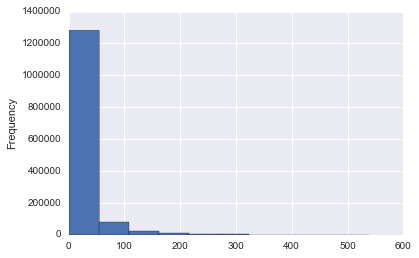

In [25]:
#Picking threshold for answer count
#Distribution of answer counts for people with about me's
users_aboutme_people.Id_y_y.plot(kind='hist')


In [26]:
users_aboutme_people.describe()

,Id_x,OwnerUserId_x,ParentId,Score_x,Id_y_x,OwnerUserId_y,Score_y,DownVotes,Age,Reputation,Views,UpVotes,User_Id,AccountId,Id_y_y
count,1.405253e+06,1.396405e+06,1.405253e+06,1.405253e+06,1.405253e+06,1.405253e+06,1.405253e+06,1.405253e+06,582685.000000,1.405253e+06,1.405253e+06,1.405253e+06,1.405253e+06,1.405253e+06,1.405253e+06
mean,1.791934e+07,1.338977e+06,1.672600e+07,2.819587e+00,1.672600e+07,1.422938e+06,6.702583e+00,4.385246e+01,31.647466,4.652704e+03,9.554672e+02,4.249694e+02,1.422938e+06,1.522480e+06,2.045887e+01
std,1.138228e+07,1.436200e+06,1.126697e+07,1.751557e+01,1.126697e+07,1.396760e+06,4.758499e+01,4.129714e+02,8.874793,2.219246e+04,2.154672e+04,1.125259e+03,1.396760e+06,1.822750e+06,3.808981e+01
min,9.200000e+01,1.000000e+00,8.000000e+01,-4.200000e+01,8.000000e+01,1.000000e+00,-4.900000e+01,0.000000e+00,13.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,8.037841e+06,NaN,6.918720e+06,0.000000e+00,6.918720e+06,3.290010e+05,0.000000e+00,0.000000e+00,NaN,1.310000e+02,2.900000e+01,1.500000e+01,3.290010e+05,1.288030e+05,3.000000e+00
50%,1.697446e+07,NaN,1.526964e+07,1.000000e+00,1.526964e+07,9.793870e+05,1.000000e+00,2.000000e+00,NaN,7.280000e+02,1.160000e+02,8.700000e+01,9.793870e+05,9.065690e+05,8.000000e+00
75%,2.729834e+07,NaN,2.568156e+07,2.000000e+00,2.568156e+07,2.103088e+06,3.000000e+00,1.300000e+01,NaN,2.936000e+03,4.180000e+02,3.750000e+02,2.103088e+06,2.335547e+06,2.100000e+01
max,4.014339e+07,7.045028e+06,4.014291e+07,5.718000e+03,4.014291e+07,6.792054e+06,5.190000e+03,3.899800e+04,96.000000,8.910620e+05,1.232112e+06,5.967400e+04,6.792054e+06,9.129987e+06,5.390000e+02


In [27]:
users_final_set = users_aboutme_people[users_aboutme_people['Id_y_y'] > 10]

In [29]:
users_final_set.head()

,Id_x,OwnerUserId_x,CreationDate_x,ParentId,Score_x,Body_x,Id_y_x,OwnerUserId_y,CreationDate_y,ClosedDate,...,Location,Views,AboutMe,LastAccessDate,ProfileImageUrl,UpVotes,CreationDate,User_Id,AccountId,Id_y_y
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,...,"Indianapolis, IN",1278.0,<p>Front-End Engineer at Exact Target</p>\n\n<...,2016-08-26T14:17:54.537,None,957.0,2008-08-01T13:56:33.807,58.0,47.0,22
1,2973,92.0,2008-08-06T00:00:22Z,2970,3,"<p>With a six word character password, he may ...",2970,58.0,2008-08-05T23:55:25Z,2012-03-06T03:17:01Z,...,"Indianapolis, IN",1278.0,<p>Front-End Engineer at Exact Target</p>\n\n<...,2016-08-26T14:17:54.537,None,957.0,2008-08-01T13:56:33.807,58.0,47.0,22
2,2976,204.0,2008-08-06T00:16:07Z,2970,13,<p>Try and gather as much information as you c...,2970,58.0,2008-08-05T23:55:25Z,2012-03-06T03:17:01Z,...,"Indianapolis, IN",1278.0,<p>Front-End Engineer at Exact Target</p>\n\n<...,2016-08-26T14:17:54.537,None,957.0,2008-08-01T13:56:33.807,58.0,47.0,22
3,2978,419.0,2008-08-06T00:24:23Z,2970,2,<P>Is the site just plain static HTML? i.e. he...,2970,58.0,2008-08-05T23:55:25Z,2012-03-06T03:17:01Z,...,"Indianapolis, IN",1278.0,<p>Front-End Engineer at Exact Target</p>\n\n<...,2016-08-26T14:17:54.537,None,957.0,2008-08-01T13:56:33.807,58.0,47.0,22
4,3055,116.0,2008-08-06T03:31:22Z,2970,5,<p>You mention your Dad was using a website pu...,2970,58.0,2008-08-05T23:55:25Z,2012-03-06T03:17:01Z,...,"Indianapolis, IN",1278.0,<p>Front-End Engineer at Exact Target</p>\n\n<...,2016-08-26T14:17:54.537,None,957.0,2008-08-01T13:56:33.807,58.0,47.0,22


In [30]:
users_final_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591606 entries, 0 to 1976464
Data columns (total 30 columns):
Id_x               591606 non-null int64
OwnerUserId_x      587092 non-null float64
CreationDate_x     591606 non-null object
ParentId           591606 non-null int64
Score_x            591606 non-null int64
Body_x             591606 non-null object
Id_y_x             591606 non-null int64
OwnerUserId_y      591606 non-null float64
CreationDate_y     591606 non-null object
ClosedDate         29101 non-null object
Score_y            591606 non-null int64
Title              591606 non-null object
Body_y             591606 non-null object
tags               591606 non-null object
DownVotes          591606 non-null float64
DisplayName        591606 non-null object
Age                276816 non-null float64
WebsiteUrl         539242 non-null object
EmailHash          0 non-null object
Reputation         591606 non-null float64
Location           381042 non-null object
Views       

In [31]:
users_final_set.rename(columns = {'Id_y_y': 'Answer_count','Body_y':'Answer_body','Score_y':'Answer_score','CreationDate_y':
                       'Answer_CreationDate','OwnerUserId_y':'Answer_OwnerId','Id_y_x':'Answer_id','Body_x':
                       'Question_body','Score_x':'Question_score','CreationDate_x':'Question_CreationDate',
                       'OwnerUserId_x':'Question_OwnerId','Id_x':'Question_id'},inplace=True)

/Users/varshapullabhotla/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [32]:
users_final_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591606 entries, 0 to 1976464
Data columns (total 30 columns):
Question_id              591606 non-null int64
Question_OwnerId         587092 non-null float64
Question_CreationDate    591606 non-null object
ParentId                 591606 non-null int64
Question_score           591606 non-null int64
Question_body            591606 non-null object
Answer_id                591606 non-null int64
Answer_OwnerId           591606 non-null float64
Answer_CreationDate      591606 non-null object
ClosedDate               29101 non-null object
Answer_score             591606 non-null int64
Title                    591606 non-null object
Answer_body              591606 non-null object
tags                     591606 non-null object
DownVotes                591606 non-null float64
DisplayName              591606 non-null object
Age                      276816 non-null float64
WebsiteUrl               539242 non-null object
EmailHash                0

In [34]:
#Unique number of users 
print len(users_final_set.Answer_OwnerId.unique())

#Shape of the data set
users_final_set.shape

25562


(591606, 30)

In [ ]:
#Cleaning the data set

In [36]:
# 1. Dropping EmailHash
users_final_set.drop('EmailHash',inplace=True,axis=1)

/Users/varshapullabhotla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [37]:
users_final_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591606 entries, 0 to 1976464
Data columns (total 29 columns):
Question_id              591606 non-null int64
Question_OwnerId         587092 non-null float64
Question_CreationDate    591606 non-null object
ParentId                 591606 non-null int64
Question_score           591606 non-null int64
Question_body            591606 non-null object
Answer_id                591606 non-null int64
Answer_OwnerId           591606 non-null float64
Answer_CreationDate      591606 non-null object
ClosedDate               29101 non-null object
Answer_score             591606 non-null int64
Title                    591606 non-null object
Answer_body              591606 non-null object
tags                     591606 non-null object
DownVotes                591606 non-null float64
DisplayName              591606 non-null object
Age                      276816 non-null float64
WebsiteUrl               539242 non-null object
Reputation               5

In [39]:
users_final_set['Answer_CreationDate'] = users_final_set['Answer_CreationDate'].apply(lambda x: x.replace("T"," "))
users_final_set['Question_CreationDate'] = users_final_set['Question_CreationDate'].apply(lambda x: x.replace("T"," "))
users_final_set['CreationDate'] = users_final_set['CreationDate'].apply(lambda x: x.replace("T"," "))
#users_final_set['ClosedDate'] = users_final_set['ClosedDate'].apply(lambda x: x.replace("T"," "))
users_final_set['LastAccessDate'] = users_final_set['LastAccessDate'].apply(lambda x: x.replace("T"," "))


users_final_set['Answer_CreationDate'] = users_final_set['Answer_CreationDate'].apply(lambda x: x.replace("Z"," "))
users_final_set['Question_CreationDate'] = users_final_set['Question_CreationDate'].apply(lambda x: x.replace("Z"," "))
users_final_set['CreationDate'] = users_final_set['CreationDate'].apply(lambda x: x.replace("Z"," "))
users_final_set['LastAccessDate'] = users_final_set['LastAccessDate'].apply(lambda x: x.replace("Z"," "))


/Users/varshapullabhotla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/varshapullabhotla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/varshapullabhotla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [42]:
#Converting temporal variables into datetime type
users_final_set['CreationDate'] = pd.to_datetime(users_final_set['CreationDate'],infer_datetime_format=True)
users_final_set['Answer_CreationDate'] = pd.to_datetime(users_final_set['Answer_CreationDate'],infer_datetime_format=True)
users_final_set['Question_CreationDate'] = pd.to_datetime(users_final_set['Question_CreationDate'],infer_datetime_format=True)
users_final_set['LastAccessDate'] = pd.to_datetime(users_final_set['LastAccessDate'],infer_datetime_format=True)

/Users/varshapullabhotla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/varshapullabhotla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/varshapullabhotla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [45]:
users_final_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591606 entries, 0 to 1976464
Data columns (total 29 columns):
Question_id              591606 non-null int64
Question_OwnerId         587092 non-null float64
Question_CreationDate    591606 non-null datetime64[ns]
ParentId                 591606 non-null int64
Question_score           591606 non-null int64
Question_body            591606 non-null object
Answer_id                591606 non-null int64
Answer_OwnerId           591606 non-null float64
Answer_CreationDate      591606 non-null datetime64[ns]
ClosedDate               29101 non-null object
Answer_score             591606 non-null int64
Title                    591606 non-null object
Answer_body              591606 non-null object
tags                     591606 non-null object
DownVotes                591606 non-null float64
DisplayName              591606 non-null object
Age                      276816 non-null float64
WebsiteUrl               539242 non-null object
Reputation

In [57]:
#len(aboutme.apply(lambda x: 1 if len(x) == 1 else 0))

591606

In [61]:
users_final_set['About_me'].unique()

array([ u'Front-End Engineer at Exact Target\nCo-Author of HTML, XHTML and CSS All-in-one Desk Reference for Dummies\nGraduated from IU with a Bachelors of Media Arts and Science and a Certificate in Applied Computer Science.\nTech Editor for Building Facebook Applications for Dummies and Building Websites All-in-one for Dummies 2nd Edition.\nCreator and maintainer of the Status-bar Calculator Firefox and Chrome extensions\nThree years professional experience in Java E-Commerce Development and four years professional experience with PHP\nTeach Server Side Programming with PHP and Mobile Applications Development at IUPUI\n',
       u'a long time ago i found an xss vuln here and took down the entire site\nuserid 26, respect\n',
       u"Full-Stack Developer at Stack Overflow, working to make our little corner of the Internet better for all of us.\nIf it consumes electricity, chances are good that I worked with it or at least know about it. Graduated as SysAdmin, turned Programmer. C# (AS

In [69]:
#users_final_set = pd.read_csv("/Users/varshapullabhotla/Documents/Capstone_project/EDA/users_profile_final.csv")

In [31]:
users_final_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339640 entries, 0 to 339639
Data columns (total 32 columns):
Unnamed: 0               339640 non-null int64
Unnamed: 0.1             339640 non-null int64
Question_id              339640 non-null int64
Question_OwnerId         336875 non-null float64
Question_CreationDate    339640 non-null object
ParentId                 339640 non-null int64
Question_score           339640 non-null int64
Question_body            339640 non-null object
Answer_id                339640 non-null int64
Answer_OwnerId           339640 non-null float64
Answer_CreationDate      339640 non-null object
ClosedDate               17578 non-null object
Answer_score             339640 non-null int64
Title                    339640 non-null object
Answer_body              339640 non-null object
tags                     339640 non-null object
DownVotes                339640 non-null float64
DisplayName              339615 non-null object
Age                      21778

In [62]:
from nltk.corpus import stopwords
def html_to_words( raw_html ):
    # Function to convert a raw html to a string of words
    # The input is a single string (a raw html), and 
    # the output is a single string (preprocessed text)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_html).get_text() 
    #
    # 2. Remove non-letters        
    #letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    review_text = review_text.replace("\n","")
    #
    # 3. Convert to lower case, split into individual words
    words = review_text.lower().split()                             
    #
    
    # 4. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join(words ))   


In [70]:
#Transform html raw text in columns Question body , Answer_body and AboutMe

users_final_set['Question_body'] = users_final_set.Question_body.apply(html_to_words)
users_final_set['Answer_body'] = users_final_set.Answer_body.apply(html_to_words)
users_final_set['AboutMe'] = users_final_set.AboutMe.apply(html_to_words)

In [64]:
sample

0         version control with subversiona very good res...
1         with a six word character password, he may hav...
2         try and gather as much information as you can....
3         is the site just plain static html? i.e. he ha...
4         you mention your dad was using a website publi...
5         i know this is a little late in the game, but ...
6         you defined the primary key twice. try:create ...
7         i ran the code here, and the error message sho...
8         can you provide the definition of the vendor t...
9         we had been hacked from same guys apparently! ...
10        unplug the webserver without shutting it down ...
11        this happened to a client of mine recently tha...
12        you can also try version control for the stand...
13        i have written a server side code removal tool...
14        my easy click-by-click instructions (specific ...
15        you can try (not tested myself) this other pos...
16        the problem is witheval $(prin

In [46]:
users_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339640 entries, 0 to 339639
Data columns (total 32 columns):
Unnamed: 0               339640 non-null int64
Unnamed: 0.1             339640 non-null int64
Question_id              339640 non-null int64
Question_OwnerId         336875 non-null float64
Question_CreationDate    339640 non-null object
ParentId                 339640 non-null int64
Question_score           339640 non-null int64
Question_body            339640 non-null object
Answer_id                339640 non-null int64
Answer_OwnerId           339640 non-null float64
Answer_CreationDate      339640 non-null object
ClosedDate               17578 non-null object
Answer_score             339640 non-null int64
Title                    339640 non-null object
Answer_body              339640 non-null object
tags                     339640 non-null object
DownVotes                339640 non-null float64
DisplayName              339615 non-null object
Age                      21778

In [51]:
jobs = pd.read_csv("jobs_final.csv")

In [71]:
jobs.summary = jobs.summary.apply(html_to_words)

In [72]:
jobs.summary

0        /*remove application code box for returning ap...
1        var _csrf_token_name = 'sgjy'; var _csrf_token...
2        irhythm job - details | irhythm technologies $...
3        square product analyst | smartrecruiters.butto...
4        (function(h){h.classname=h.classname.replace(/...
5        job description | armanino careers $(document)...
6        job application for data scientist at nunawind...
7        krg technology inc back end java developer | s...
8        senior data analyst at capital one - usdocumen...
9        window.nreum||(nreum={});nreum.info={"beacon":...
10       job details | csu careers table th { color: bl...
11       careers | earnest { "@context": "http://schema...
12       job application for senior/principal data scie...
13       window.nreum||(nreum={});nreum.info={"beacon":...
14       jobs - everstring var url = window.location.hr...
15       robotics: machine learning engineer | activ te...
16       data scientist × supercell!function(f,b,e,v,n,.